In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("EMOASemanticData.csv")
df.head()

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,...,K fix,K dur,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,...,5,3015788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,...,6,2948673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,...,7,2632285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,...,6,2815571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,...,3,1249473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df=df.iloc[:,0:17]

In [84]:
feature_k_dur = data['K dur']

In [85]:
hist, bin_edges = np.histogram(feature_k_dur, bins=30)

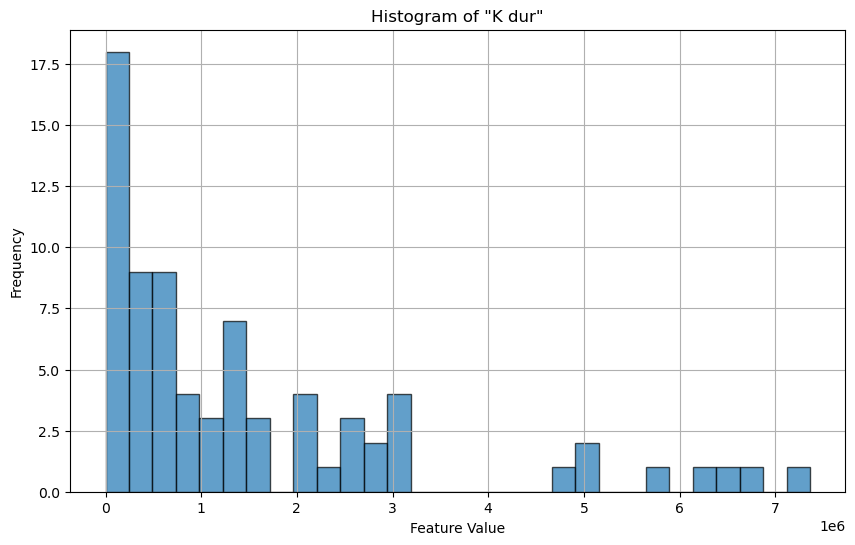

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(feature_k_dur, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of "K dur"')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [87]:
mean = feature_k_dur.mean()
variance = feature_k_dur.var()
print(f"Mean of 'K dur': {mean}")
print(f"Variance of 'K dur': {variance}")

Mean of 'K dur': 1516334.9733333334
Variance of 'K dur': 3263933954187.2427


In [88]:
df

,Participant Code,Trial,Correctly Answerd,Total Fixation,Total Duration,Q fix,Q dur,A fix,A dur,B fix,B dur,C fix,C dur,D fix,D dur,K fix,K dur
0,STUD-P01,Trial001,yes,33,15894369,23,9863210,2,416747,1,3498659,2,616611,1,299874,5,3015788
1,STUD-P02,Trial001,no,45,16776943,27,9346725,7,3565207,5,2565588,2,466607,1,299810,6,2948673
2,STUD-P03,Trial001,yes,41,11943779,26,8129800,4,1032671,1,199985,1,283242,2,432954,7,2632285
3,STUD-P04,Trial001,yes,55,22215175,37,16711365,5,1854232,5,1600796,1,333097,1,283149,6,2815571
4,STUD-P05,Trial001,yes,24,10629981,15,5398827,1,399904,3,3082239,3,1166091,0,0,3,1249473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,STUD-P11,Trial005,no,29,10745558,20,8013096,1,366440,1,316646,3,1082942,1,349840,2,316199
71,STUD-P12,Trial005,yes,26,8912917,17,3865009,4,2665604,2,533244,1,732945,0,0,2,366415
72,STUD-P13,Trial005,no,54,12260893,29,6663119,2,583042,4,783463,0,0,0,0,4,833075
73,STUD-P14,Trial005,yes,38,9097022,15,3999012,2,449990,2,299922,0,0,0,0,0,0


In [89]:
 # these are feature vectors 
vector1 = df.iloc[0][['C dur', 'D dur']].values
vector2 = df.iloc[1][['C dur', 'D dur']].values


In [90]:
def minkowski_distance(x, y, p):
    return np.power(np.sum(np.abs(x - y)**p), 1/p)

# Calculate distances for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

C:\Users\year2\AppData\Local\Temp\ipykernel_17496\3268983802.py:2: RuntimeWarning: invalid value encountered in power
  return np.power(np.sum(np.abs(x - y)**p), 1/p)


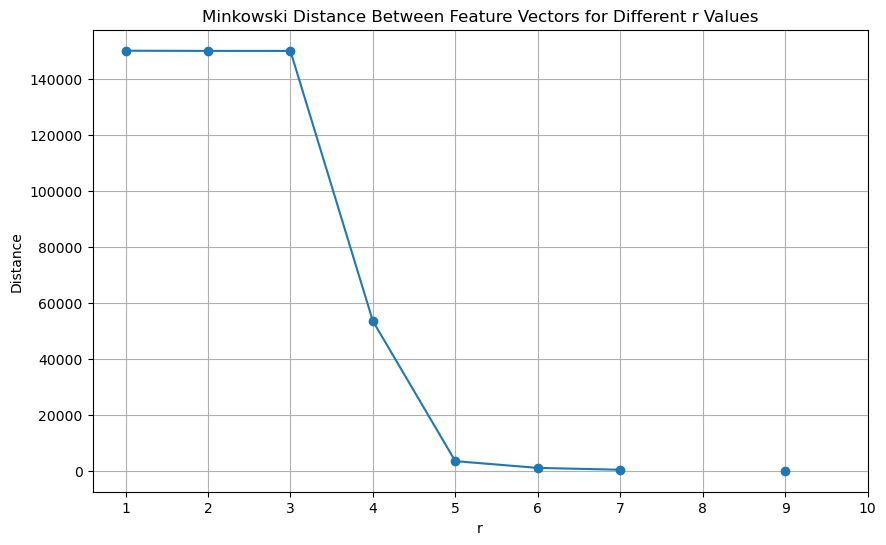

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance Between Feature Vectors for Different r Values')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
y=df["Correctly Answerd"]
X = data.drop(columns=['Correctly Answerd'])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [96]:
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the target to numeric if it's categorical
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=0)

X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Create and fit the kNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
try:
    y_pred = neigh.predict(X_test_array)
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy of kNN classifier: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
except Exception as e:
    print(f"Error during prediction or evaluation: {e}")

Accuracy of kNN classifier: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.17      0.14      0.15         7

    accuracy                           0.52        23
   macro avg       0.41      0.42      0.41        23
weighted avg       0.50      0.52      0.51        23



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [99]:
test_vect = X_test[['Correctly Answerd']].values  # Extracting the feature vector
test_vect = test_vect.reshape(1, -1)  # Reshape to 2D array (1 sample, multiple features)

# Predict the class for the test vector
predicted_class = neigh.predict(test_vect)
print("Predicted class:", predicted_class[0])

KeyError: "None of [Index(['Correctly Answerd'], dtype='object')] are in the [columns]"